# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [13]:
x_Test_normalize.shape

(10000, 784)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
#建立模型
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

W0714 05:27:07.423575 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 05:27:07.447145 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 05:27:07.449829 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0714 05:28:06.510326 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 05:28:06.537905 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# 訓練模型

In [16]:
history = model.fit(x_Train_normalize, y_Train_OneHot, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

W0714 05:29:22.738422 140706006374272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 05:29:22.792641 140706006374272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 134us/step - loss: 0.2579 - acc: 0.9244 - val_loss: 0.1127 - val_acc: 0.9659
Epoch 2/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.0963 - acc: 0.9700 - val_loss: 0.0891 - val_acc: 0.9742
Epoch 3/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0663 - acc: 0.9788 - val_loss: 0.0931 - val_acc: 0.9728
Epoch 4/50
48000/48000 [==============================] - 5s 106us/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.0814 - val_acc: 0.9757
Epoch 5/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0361 - acc: 0.9885 - val_loss: 0.0895 - val_acc: 0.9753
Epoch 6/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.0285 - acc: 0.9903 - val_loss: 0.0970 - val_acc: 0.9756
Epoch 7/50
48000/48000 [==============================] - 5s 105us/step - loss: 0.0245 - acc: 0.9920 - val_loss: 0.1056 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

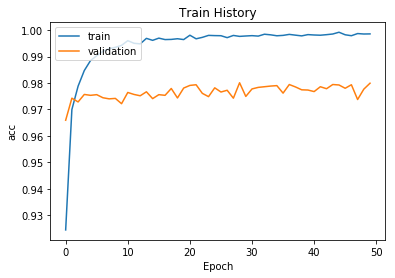

In [21]:
show_train_history(history,'acc','val_acc')

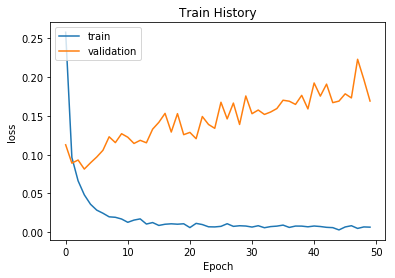

In [22]:
show_train_history(history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 35us/step

accuracy= 0.9812
